# Caso 7: Programación de turnos - Implementación

---
## Maestría en Inteligencia Analítica para la Toma de Decisiones


* **Profesor**:
    * *Andrés Medaglia*
* **Asistentes**
    * *Ariel Rojas*
    * *Carlos Arroyo*

## Instrucciones generales

El primer paso antes de resolver este laboratorio es leer y entender el **enunciado del caso**. Una vez tengas claro el caso, te explicamos la estructura de este laboratorio (los demás laboratorios siguen una estrucutra similar).

Este laboratorio contiene:
* **Formulación**: Un breve resumen del modelo con notación matemática y descripción de sus componentes
* **Importación de librerías**
* **Creación de parámetros**
* **Modelado - Escenario 1**
* **Reporte de Resultados - Escenario 1**
* **Modelado - Escenario 2**
* **Reporte de Resultados - Escenario 2**

Este tipo de actividades se evaluará sobre un total de 100 puntos. Las celdas calificables se distinguen por tener la instrucción `# your code here`. Antes de estas celdas  encontrarás instrucciones y consejos para resolver las preguntas, también el puntaje que le corresponde.

¡Éxitos!

## Formulación
---

Te presentamos la formulación del caso de la semana de forma resumida. Te recomendamos revisar la formulación una vez hayas leído el enunciado del caso. Es bueno que te familiarices con los elementos de la formulación antes de iniciar la implementación.

### Conjuntos y Parámetros
>#### **Conjuntos**
>* $T$: conjunto de turnos
>* $F$: conjunto de franjas horarias

>#### **Parámetros**
>* $c_t$: costo diario de contratar un domiciliario de turno $t\in T$
>* $d_f$: cantidad mínima de domiciliarios requeridos en la franja $f\in F$
>* $a_{ft}= \begin{cases}1, & \text{el turno } t\in T \text{ cubre la franja } f\in F \\ 0, & \text{de lo contrario}\end{cases} $

### Variables de Decisión
>* $x_{t}$: cantidad de domiciliarios del turno $t\in T$ a contratar

### Restricciones
> *# Para desarrollo del estudiante*
>> $\sum_{t \in T}a_{ft}*x_{t}>=d_f $ para todo $f \in F$

> Naturaleza de las variables
>> $x_{t} \in Z^+$ 

### Función Objetivo
> *# Para desarrollo del estudiante*
>> Min $\sum c_t x_t$

## Importación de librerías
---

In [47]:
import pulp as lp
import pandas as pd
from datetime import datetime

## Creación de Parámetros
---

**Importación de parámetros desde archivo local**

In [48]:
archivo = "Soporte Caso 7.xlsx"
turnos_esc_1 = pd.read_excel(archivo, sheet_name="Turnos Escenario 1")
turnos_esc_2 = pd.read_excel(archivo, sheet_name="Turnos Escenario 2")
costos_esc_1 = pd.read_excel(archivo, sheet_name="Costos Escenario 1")
costos_esc_2 = pd.read_excel(archivo, sheet_name="Costos Escenario 2")

### Conjuntos

Para crear los conjuntos utilizamos algunos de los parámetros importados, recomendados mucho que explores estos parámetros luego de la importación.

In [49]:
# Conjunto turnos en el escenario 1
Turnos_1 = list(turnos_esc_1.columns[2:])

# Conjunto turnos en el escenario 2
Turnos_2 = list(turnos_esc_2.columns[2:])

# Conjunto de franjas horarias
Franjas = list(turnos_esc_1.Franjas)

### Parámetros

In [50]:
# Parámetros indexados en turnos
costos_1 = {row[0]: row[1] for _, row in costos_esc_1.iterrows()}
costos_2 = {row[0]: row[1] for _, row in costos_esc_2.iterrows()}

# Parámetros indexados en franjas horarias
demandas = {row[0]: row[1] for _, row in turnos_esc_1.iterrows()}

# Parámetros indexados en (franja, turno)
cubrimiento_1 = {}
for _, row in turnos_esc_1.iterrows():
    f = row[0]
    for t in Turnos_1:
        cubrimiento_1[f, t] = row[t]

cubrimiento_2 = {}
for _, row in turnos_esc_2.iterrows():
    f = row[0]
    for t in Turnos_2:
        cubrimiento_2[f, t] = row[t]

**Celda de Prueba (0 puntos)**

Es una buena práctica imprimir algunos objetos que contienen los parámetros en la consola luego de crearlos. De esta forma puedes corregir errores y familiarizarte con las estrucutras de datos que se van a utilizar. Puedes hacer estas pruebas en la celda a continuación.

* **Esta celda no es calificable**

In [51]:
# Aquí puedes explorar los parámetros
cubrimiento_1
Turnos_1
Franjas


['11:00am - 11:30am',
 '11:30am - 12:00pm',
 '12:00pm - 12:30pm',
 '12:30pm - 1:00pm',
 '1:00pm - 1:30pm',
 '1:30pm - 2:00pm',
 '2:00pm - 2:30pm',
 '2:30pm - 3:00pm',
 '3:00pm - 3:30pm',
 '3:30pm - 4:00pm',
 '4:00pm - 4:30pm',
 '4:30pm - 5:00pm',
 '5:00pm - 5:30pm',
 '5:30pm - 6:00pm',
 '6:00pm - 6:30pm',
 '6:30pm - 7:00pm',
 '7:00pm - 7:30pm',
 '7:30pm - 8:00pm',
 '8:00pm - 8:30pm',
 '8:30pm - 9:00pm',
 '9:00pm - 9:30pm',
 '9:30pm - 10:00pm',
 '10:00pm - 10:30pm',
 '10:30pm - 11:00pm']

## Modelamiento - Escenario 1
---
Primero, vamos a explorar el problema desde el primer escenario. Es **muy importante** que utilices los parámetros que corresponden a este escenario durante la creación del modelo.

### Declaración del modelo

**Pregunta 1**
* Crea un objeto modelo en PuLP llamado `problema`

In [52]:
# your code here
problema=lp.LpProblem("Caso_7",lp.LpMinimize)

In [8]:
# Esta celda esta reservada para uso del equipo docente

In [9]:
# Esta celda esta reservada para uso del equipo docente

### Variables de Decisión

> $x_{t}$: cantidad de domiciliarios del turno $t\in T$ a contratar
>> `# Para desarrollo del estudiante`

**Pregunta 2**
* Crea las variables del modelo: `x`, usando el método `lp.LpVariable.dicts()`
* Especifica el nombre de la variable como `'contratar'` con el argumento `name`
* Especifica sus índices con el argumento `indexs`
* Especifica que el límite inferior de la variable es 0
* Especifica su naturaleza con el argumento `cat`

In [53]:
# your code here
x=lp.LpVariable.dicts("x",(Turnos_1),lowBound=0,cat="Integer")

In [11]:
x

{'Turno 1': x_Turno_1,
 'Turno 2': x_Turno_2,
 'Turno 3': x_Turno_3,
 'Turno 4': x_Turno_4,
 'Turno 5': x_Turno_5}

In [12]:
# Esta celda esta reservada para uso del equipo docente

In [13]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 3**
* Crea la función objetivo y agrégala al modelo `problema`

In [54]:
# your code here
problema+=lp.lpSum([costos_1[t]*x[t] for t in Turnos_1])

In [15]:
# Esta celda esta reservada para uso del equipo docente


### Restricciones
    
> **Advertencia**: `pulp` no permite sobreescribir restricciones, entonces, si ya creaste una restricción y quieres crearla de nuevo para corregir algo, asegúrate de volver a crear el modelo `problema` desde el principio. (Nosotros haremos esto antes de calificar, no te preocupes)

**Pregunta 4**

* Crea el **único** grupo de restricciones del modelo, asígnale el nombre `'R1_'+str(<indice_del_para_todo>)` y añádela al modelo

> *# Para desarrollo del estudiante*
>> `# Para desarrollo del estudiante`

> **Nota:** ten en cuenta que el parámetro $d_f$ se define como la cantidad **mínima** de domiciliarios requeridos en la franja $f\in F$.

In [56]:
# Assuming you already have the 'problema' defined
# Indexed parameters cubrimiento_1
for f in Franjas:
    problema += lp.lpSum([x[t] * cubrimiento_1[f, t] for t in Turnos_1]) >= demandas[f]


In [17]:
# Esta celda esta reservada para uso del equipo docente

### Invocar el optimizador

In [57]:
inicio = datetime.now()
problema.solve()
print("Tiempo transcurrido:", datetime.now() - inicio)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/davidmoreno/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/yd/vq4l_9kd7q71gkrqg9qyp_9m0000gn/T/36d32c56e90042ce9771bf160421d267-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/yd/vq4l_9kd7q71gkrqg9qyp_9m0000gn/T/36d32c56e90042ce9771bf160421d267-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 29 COLUMNS
At line 115 RHS
At line 140 BOUNDS
At line 146 ENDATA
Problem MODEL has 24 rows, 5 columns and 70 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 826800 - 0.00 seconds
Cgl0003I 0 fixed, 5 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 6 rows, 5 columns (5 integer (0 of which binary)) and 19 elements
Cutoff increment increased from 1e-05 to 63600
Cbc0012I Integer solution of 826800 found b

## Reporte de resultados - Escenario 1
---

**Estado del optimizador, función objetivo y otros indicadores**

**Pregunta 5**

* Despues de haber corrido el modelo: `<modelo>.solve()`, asigna a una nueva variable `estado` el estado del optimizador en palabras según `lp.LpStatus`.
* Asigna el valor de la función objetivo a la variable `obj`

In [58]:
# your code here
problema.solve()
obj=lp.value(problema.objective)
obj

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/davidmoreno/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/yd/vq4l_9kd7q71gkrqg9qyp_9m0000gn/T/7920dbd2385d436bbf403a679e5bf89a-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/yd/vq4l_9kd7q71gkrqg9qyp_9m0000gn/T/7920dbd2385d436bbf403a679e5bf89a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 29 COLUMNS
At line 115 RHS
At line 140 BOUNDS
At line 146 ENDATA
Problem MODEL has 24 rows, 5 columns and 70 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 826800 - 0.00 seconds
Cgl0003I 0 fixed, 5 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 6 rows, 5 columns (5 integer (0 of which binary)) and 19 elements
Cutoff increment increased from 1e-05 to 63600
Cbc0012I Integer solution of 826800 found b

826800.0

La función objetivo en este caso nos da 826800.0

In [20]:
# Esta celda esta reservada para uso del equipo docente

**Contratación de domiciliarios**

Después de correr el modelo, seguramente queremos conocer cuantos domiciliarios se contratan de cada turno para dar una recomedación a la empresa. De esto se trata la siguiente pregunta.

**Pregunta 6**

* Guarda el total de domiciliarios a contratar en la variable `total`
* Guarda en un diccionario `contratacion` los empleados contratados en cada turno, tal que las **llaves** sean los turnos que pertecen a `Turnos_1` y los **valores** sean el número de domiciliarios a contratar para ese turno (utiliza `int()` para convertir estos valores a enteros)


**Nota:** dado que ya pasó el proceso de optimización, en caso de ser necesario, se debe usar la función `sum` y no `lp.lpSum` para recuperar resultados.

In [21]:
# your code here
total1=[x[t].varValue for t in Turnos_1]
suma_total2=[]
#COnvert all NoneType to 0 in this list
for i in total1:
    if i==None:

        i=0
    else:
        i=i
    suma_total2.append(i)
suma_total2

total=sum(suma_total2)
total


13.0

In [59]:
contratacion={}
for t in Turnos_1:
    contratacion[t]=x[t].varValue
contratacion

{'Turno 1': 2.0,
 'Turno 2': 3.0,
 'Turno 3': 0.0,
 'Turno 4': 6.0,
 'Turno 5': 2.0}

Total tiene el numero de domiciliarios a contratar y contratacion tiene el diccionario con los turnos.

In [ ]:
# Esta celda esta reservada para uso del equipo docente

## Visualizaciones - Escenario 1
---

**Cubrimiento de demanda en franjas horarias**

Esta visualización es muy útil para comparar los dos escenarios. Cuando termines con el segundo escenario, asegúrate de volver a esta celda y comprobar la diferencia!

/var/folders/yd/vq4l_9kd7q71gkrqg9qyp_9m0000gn/T/ipykernel_55055/2939248837.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


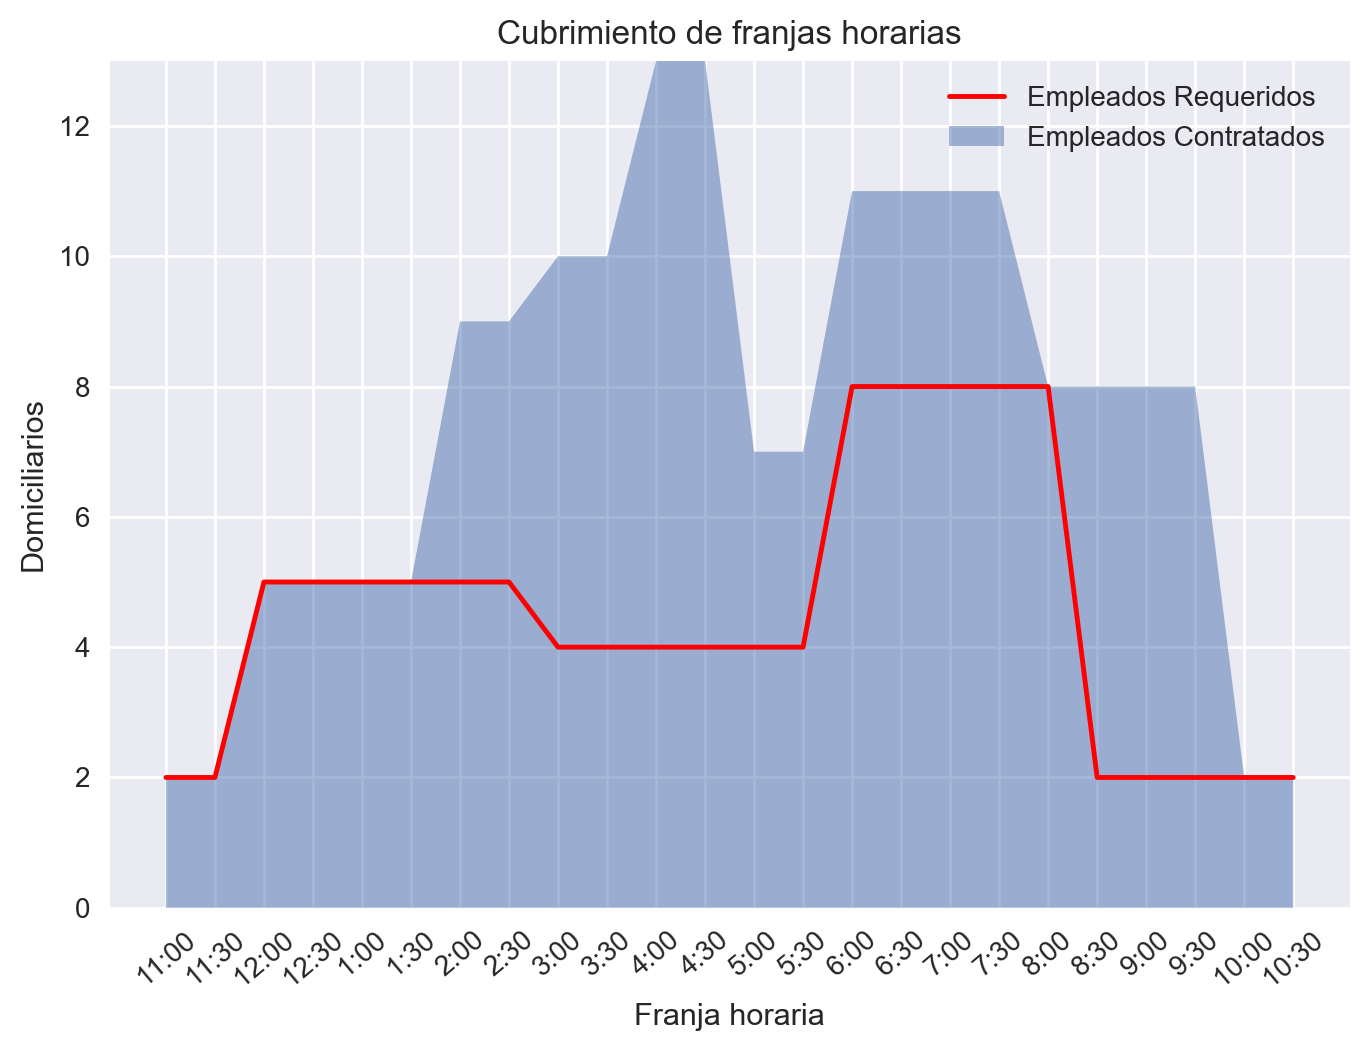

In [60]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

Franjas_ = []
for f in Franjas:
    if f[4] == "p":
        Franjas_.append(f[:4])
    else:
        Franjas_.append(f[:5])

oferta = [sum(cubrimiento_1[f, t] * x[t].value() for t in Turnos_1) for f in Franjas]

plt.plot(Franjas_, list(demandas.values()), c="r", label="Empleados Requeridos")
plt.fill_between(Franjas_, oferta, alpha=0.5, label="Empleados Contratados")
plt.legend()
plt.xticks(rotation=40)
plt.xlabel("Franja horaria")
plt.ylabel("Domiciliarios")
plt.ylim(0, 13)
plt.title("Cubrimiento de franjas horarias")
plt.show()

## Modelamiento - Escenario 2
---
Ahora, vamos a explorar el problema desde el segundo escenario. Es **muy importante** que utilices los parámetros que corresponden a este escenario durante la creación del modelo.

### Declaración del modelo

**Pregunta 7**
* Crea un objeto modelo en PuLP llamado `problema2`

In [61]:
# your code here
problema2=lp.LpProblem("Caso_7_2",lp.LpMinimize)


In [ ]:
# Esta celda esta reservada para uso del equipo docente

In [ ]:
# Esta celda esta reservada para uso del equipo docente

### Variables de Decisión

> $x_{t}$: cantidad de domiciliarios del turno $t\in T$ a contratar
>> `# Para desarrollo del estudiante`

**Pregunta 8**
* Crea las variables del modelo: `x`, usando el método `lp.LpVariable.dicts()`
* Especifica el nombre de la variable como `'contratar'` con el argumento `name`
* Especifica sus índices con el argumento `indexs`
* Especifica que el límite inferior de la variable es 0
* Especifica su naturaleza con el argumento `cat`

In [62]:
# your code here
x=lp.LpVariable.dicts("x",(Turnos_2),lowBound=0,cat="Integer")


In [ ]:
# Esta celda esta reservada para uso del equipo docente

In [ ]:
# Esta celda esta reservada para uso del equipo docente

### Función Objetivo

> *# Para desarrollo del estudiante*
>> `# Para desarrollo del estudiante`

**Pregunta 9**
* Crea la función objetivo y agrégala al modelo `problema2`

In [63]:
# your code here
problema2+=lp.lpSum([costos_2[t]*x[t] for t in Turnos_2])


In [ ]:
# Esta celda esta reservada para uso del equipo docente

### Restricciones
    
> **Advertencia**: `pulp` no permite sobreescribir restricciones, entonces, si ya creaste una restricción y quieres crearla de nuevo para corregir algo, asegurate de volver a crear el modelo `problema` desde el principio. (Nosotros haremos esto antes de calificar, no te preocupes)

**Pregunta 10**

* Crea el **único** grupo de restricciones del modelo, asígnale el nombre `'R1_'+str(<indice_del_para_todo>)` y añádela al modelo

> *# Para desarrollo del estudiante*

> **Nota:** ten en cuenta que el parámetro $d_f$ se define como la cantidad **mínima** de domiciliarios requeridos en la franja $f\in F$.


In [64]:
# your code here
for f in Franjas:
    problema2 += lp.lpSum([x[t] * cubrimiento_2[f, t] for t in Turnos_2]) >= demandas[f]


In [ ]:
# Esta celda esta reservada para uso del equipo docente

### Invocar el optimizador

In [65]:
inicio = datetime.now()
problema2.solve()
print("Tiempo transcurrido:", datetime.now() - inicio)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/davidmoreno/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/yd/vq4l_9kd7q71gkrqg9qyp_9m0000gn/T/047b1670c07f40b39e18cc50f3146117-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/yd/vq4l_9kd7q71gkrqg9qyp_9m0000gn/T/047b1670c07f40b39e18cc50f3146117-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 29 COLUMNS
At line 387 RHS
At line 412 BOUNDS
At line 441 ENDATA
Problem MODEL has 24 rows, 28 columns and 273 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 600660 - 0.00 seconds
Cgl0003I 0 fixed, 28 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 24 rows, 28 columns (28 integer (0 of which binary)) and 273 elements
Cbc0012I Integer solution of 600660 found by greedy cover after 0 iterations and 0 

## Reporte de resultados - Escenario 2
---

**Estado del optimizador, función objetivo y otros indicadores**

**Pregunta 11**

* Despues de haber corrido el modelo: `<modelo>.solve()`, asigna a una nueva variable `estado` el estado del optimizador en palabras según `lp.LpStatus`.
* Asigna el valor de la función objetivo a la variable `obj`


In [66]:
# your code here
problema2.solve()
obj=lp.value(problema2.objective)
obj


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/davidmoreno/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/yd/vq4l_9kd7q71gkrqg9qyp_9m0000gn/T/60d7336b42b1422da07a2cd809d07c1d-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/yd/vq4l_9kd7q71gkrqg9qyp_9m0000gn/T/60d7336b42b1422da07a2cd809d07c1d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 29 COLUMNS
At line 387 RHS
At line 412 BOUNDS
At line 441 ENDATA
Problem MODEL has 24 rows, 28 columns and 273 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 600660 - 0.00 seconds
Cgl0003I 0 fixed, 28 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 24 rows, 28 columns (28 integer (0 of which binary)) and 273 elements
Cbc0012I Integer solution of 600660 found by greedy cover after 0 iterations and 0 

600660.0

La funcion objetivo nos da 600660.0

In [ ]:
# Esta celda esta reservada para uso del equipo docente

**Contratación de domiciliarios**

Después de correr el modelo, seguramente queremos conocer cuantos domiciliarios se contratan de cada turno para dar una recomedación a la empresa. De esto se trata la siguiente pregunta.

**Pregunta 12**

* Guarda el total de domiciliarios a contratar en la variable `total`
* Guarda en un diccionario `contratacion` los empleados contratados en cada turno, tal que las **llaves** sean los turnos que pertecen a `Turnos_2` y los **valores** sean el número de domiciliarios a contratar para ese turno (utiliza `int()` para convertir estos valores a enteros)


**Nota:** dado que ya pasó el proceso de optimización, en caso de ser necesario, se debe usar la función `sum` y no `lp.lpSum` para recuperar resultados.

In [67]:
# your code here
total2=[x[t].varValue for t in Turnos_2]
suma_total=[]
#COnvert all NoneType to 0 in this list
for i in total2:
    if i==None:

        i=0
    else:
        i=i
    suma_total.append(i)
suma_total
total=sum(suma_total)
total



13.0

In [68]:
contratacion={}
for t in Turnos_2:
    contratacion[t]=x[t].varValue
contratacion

{'Turno 1': 1.0,
 'Turno 2': 1.0,
 'Turno 3': 1.0,
 'Turno 4': 0.0,
 'Turno 5': 1.0,
 'Turno 6': 1.0,
 'Turno 7': 0.0,
 'Turno 8': 0.0,
 'Turno 9': 0.0,
 'Turno 10': 0.0,
 'Turno 11': 0.0,
 'Turno 12': 0.0,
 'Turno 13': 0.0,
 'Turno 14': 0.0,
 'Turno 15': 0.0,
 'Turno 16': 0.0,
 'Turno 17': 0.0,
 'Turno 18': 0.0,
 'Turno 19': 0.0,
 'Turno 20': 2.0,
 'Turno 21': 0.0,
 'Turno 22': 0.0,
 'Turno 23': 0.0,
 'Turno 24': 0.0,
 'Turno 25': 0.0,
 'Turno 26': 5.0,
 'Turno 27': 0.0,
 'Turno 28': 1.0}

Se necesitan 13 personas para el segundo caso

In [ ]:
# Esta celda esta reservada para uso del equipo docente

## Visualizaciones - Escenario 2
---

**Cubrimiento de demanda en franjas horarias**

Esta visualización es muy útil para comparar los dos escenarios. Ahora que terminaste el segundo escenario, te recomendamos ir a **Resporte de resultados - Escenario 1** y comparar las funciones objetivo, los turnos contratados y luego ir a **Visualizaciones - Escenario 1** para comparar las soluciones.

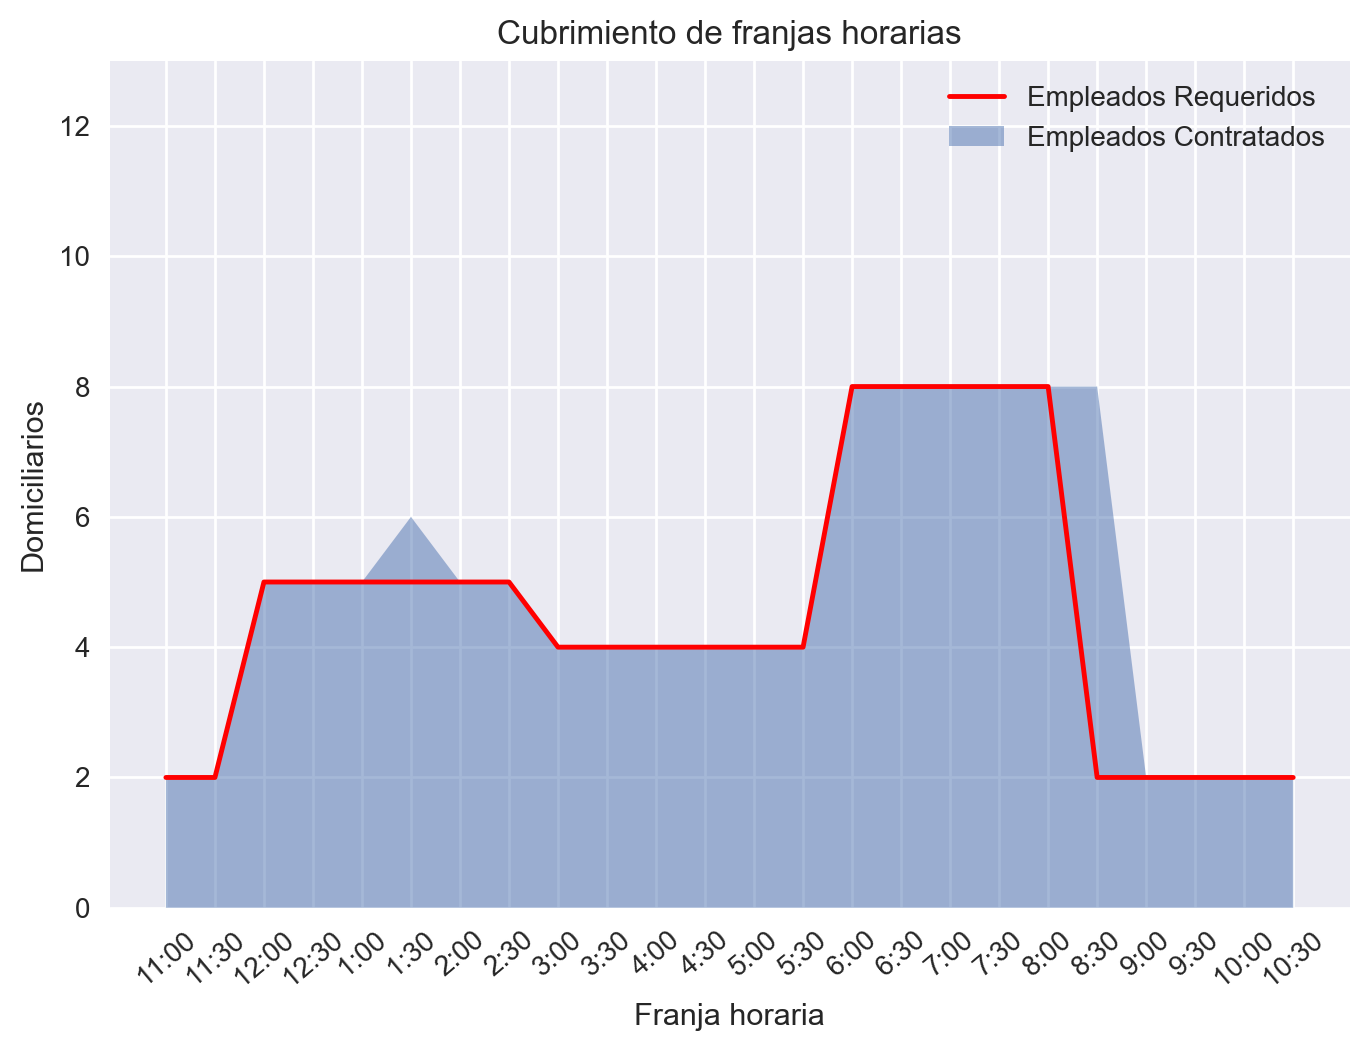

In [69]:
Franjas_ = []
for f in Franjas:
    if f[4] == "p":
        Franjas_.append(f[:4])
    else:
        Franjas_.append(f[:5])

oferta = [sum(cubrimiento_2[f, t] * x[t].value() for t in Turnos_2) for f in Franjas]

plt.plot(Franjas_, list(demandas.values()), c="r", label="Empleados Requeridos")
plt.fill_between(Franjas_, oferta, alpha=0.5, label="Empleados Contratados")
plt.legend()
plt.xticks(rotation=40)
plt.xlabel("Franja horaria")
plt.ylabel("Domiciliarios")
plt.ylim(0, 13)
plt.title("Cubrimiento de franjas horarias")
plt.show()

## Analisis de los resultados




# Caso 1: Asignación Variada de Personal por Turno

En el Caso 1, se ha implementado una asignación variada de personal por turno. Esta asignación se refleja en la cantidad de trabajadores asignados a cada turno, donde algunos turnos tienen más personal que otros. Por ejemplo, el Turno 4 tiene una asignación de 6 trabajadores, mientras que el Turno 3 no tiene trabajadores asignados.

La asignación de personal en el Caso 1 responde a las demandas específicas de cada franja horaria y turno. Esta estrategia podría ser beneficiosa para cumplir con la demanda en momentos pico, donde se requiere un mayor número de trabajadores para mantener un alto nivel de servicio. Sin embargo, también puede resultar en excedentes de personal en momentos de menor demanda, lo que aumentaría los costos operativos.

Los costos totales en el Caso 1 ascienden a 826,800 unidades monetarias.

# Caso 2: Asignación Uniforme de Personal por Turno

Por otro lado, en el Caso 2, se ha implementado una asignación uniforme de personal por turno. Cada turno tiene asignado exactamente un trabajador, lo que resulta en una distribución uniforme de la fuerza laboral durante todo el día. Esta estrategia simplifica la gestión de personal pero puede ser menos sensible a las fluctuaciones en la demanda.

Los costos totales en el Caso 2 son notoriamente más bajos, con un valor de 600,660 unidades monetarias. La asignación uniforme de personal permite una previsibilidad y una gestión más eficiente de los recursos humanos, lo que reduce los costos operativos en comparación con el Caso 1.

# Comparación de los Casos

Ahora, comparemos ambos casos en función de las diferencias clave:

1. **Asignación de Personal por Turno:**
   - En el Caso 1, la asignación de personal varía según la demanda por turno, lo que permite una respuesta rápida a los picos de demanda. En el Caso 2, la asignación es uniforme y constante.
   
2. **Costos Totales:**
   - El Caso 2 tiene costos totales significativamente más bajos en comparación con el Caso 1. Esto sugiere que, aunque la asignación uniforme de personal puede no ser tan ágil para satisfacer picos de demanda, resulta en una operación más rentable.

3. **Número de Personal Contratado:**
   - Ambos casos requieren la misma cantidad de personal, es decir, 13 trabajadores, para cubrir la demanda. Sin embargo, la distribución de ese personal entre los turnos y las franjas horarias es diferente en ambos casos.

# Conclusión

En resumen, la elección entre el Caso 1 y el Caso 2 depende de los objetivos y las restricciones específicas de la planificación de la fuerza laboral. El Caso 1 ofrece mayor flexibilidad y capacidad de respuesta a la demanda, pero a un mayor costo. El Caso 2 es más eficiente en términos de costos y ofrece una gestión más uniforme de los recursos humanos, aunque puede ser menos ágil en situaciones donde la demanda predicta pueda no ser la real, y el local se quede sin personal. Sin embargo, si quieremos minimizar los costos con la demanda predicta la mejor opción es el Caso2.



### Fin del laboratorio
---

¡Muchos éxitos!